Classes in the dataset: ['belly_pain', 'discomfort', 'burping', 'tired', 'hungry']
Classes are correctly loaded.


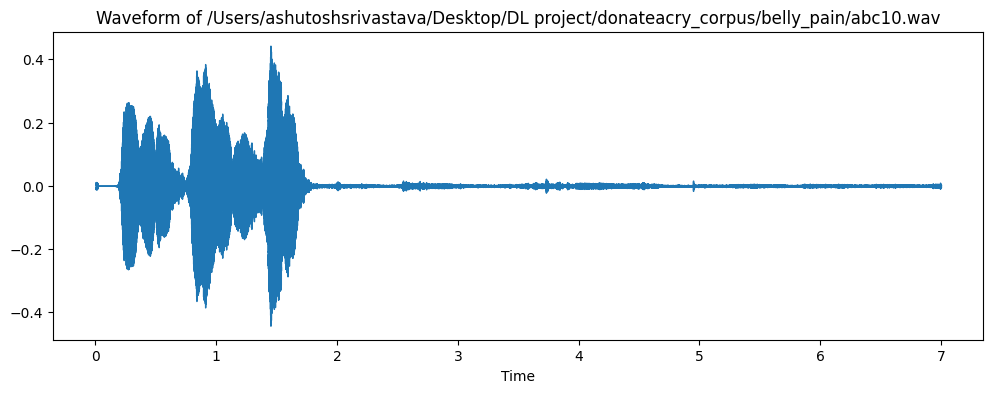

Duration of /Users/ashutoshsrivastava/Desktop/DL project/donateacry_corpus/belly_pain/abc10.wav: 7.00 seconds


In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

dataset_path = '/Users/ashutoshsrivastava/Desktop/DL project/donateacry_corpus/'

classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Classes in the dataset:", classes)

expected_classes = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']
if sorted(classes) == sorted(expected_classes):
    print("Classes are correctly loaded.")
else:
    print("Warning: Classes don't match the expected ones!")

sample_class = classes[0]  
sample_audio_file = os.path.join(dataset_path, sample_class, os.listdir(os.path.join(dataset_path, sample_class))[0])

audio, sr = librosa.load(sample_audio_file, sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f"Waveform of {sample_audio_file}")
plt.show()

duration = librosa.get_duration(y=audio, sr=sr)
print(f"Duration of {sample_audio_file}: {duration:.2f} seconds")


In [4]:
import numpy as np
import librosa
import os

dataset_path = '/Users/ashutoshsrivastava/Desktop/DL project/donateacry_corpus/'

classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

def extract_mfcc(audio_file, n_mfcc=13):
    audio, sr = librosa.load(audio_file, sr=None)
    
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    
    return np.mean(mfccs, axis=1)

features = []
labels = []

def is_audio_file(file):
    return file.endswith('.wav') or file.endswith('.mp3')

for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    
    for audio_file in os.listdir(class_path):
        audio_file_path = os.path.join(class_path, audio_file)
        
        if not is_audio_file(audio_file):
            continue
        
        try:
            mfcc_features = extract_mfcc(audio_file_path)
            features.append(mfcc_features)
            labels.append(label) 
        except Exception as e:
            print(f"Error processing {audio_file_path}: {e}")

features = np.array(features)
labels = np.array(labels)

print("Shape of features:", features.shape)
print("Shape of labels:", labels.shape)


Shape of features: (453, 13)
Shape of labels: (453,)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5507 - loss: 1.4935 - val_accuracy: 0.8132 - val_loss: 1.0404
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8314 - loss: 0.9383 - val_accuracy: 0.8132 - val_loss: 0.7646
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.6198 - val_accuracy: 0.8132 - val_loss: 0.8809
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.7599 - val_accuracy: 0.8132 - val_loss: 0.7913
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.6094 - val_accuracy: 0.8132 - val_loss: 0.7677
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - loss: 0.5375 - val_accuracy: 0.8132 - val_loss: 0.7711
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.6769 - val_accuracy: 0.8132 - val_loss: 0.7601
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.6680 - val_accuracy: 0.8132 - val_loss: 0.7718
Epo

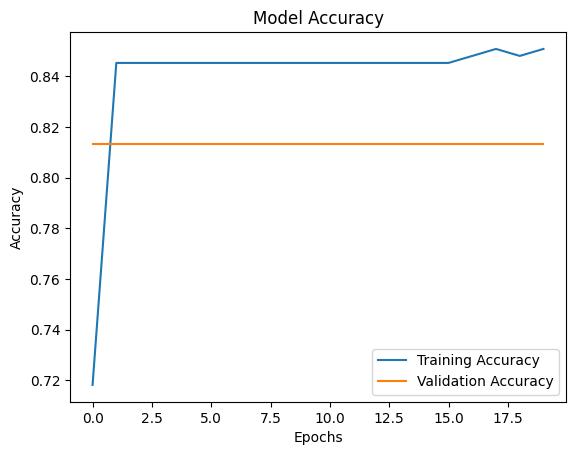

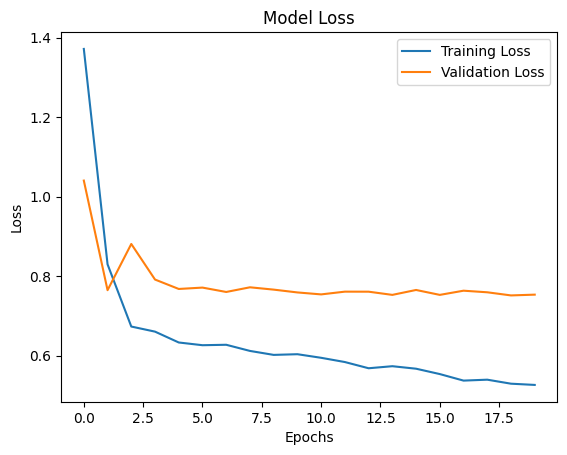

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train = X_train / np.max(np.abs(X_train), axis=0)
X_test = X_test / np.max(np.abs(X_test), axis=0)

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=len(classes))

model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(classes), activation='softmax')) 

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_test, y_test_onehot))

test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Test Accuracy: 81.32%


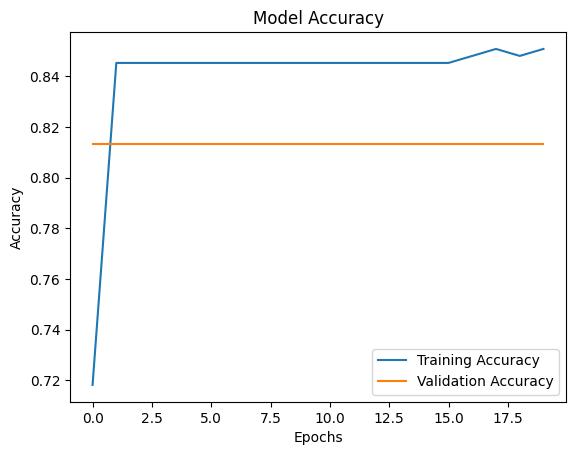

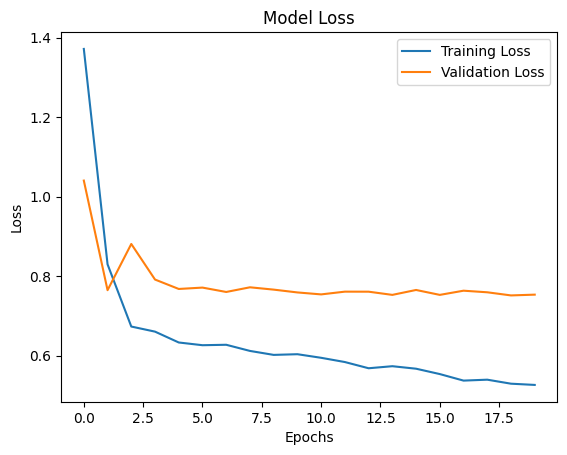

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
new_audio_file = '/Users/ashutoshsrivastava/Desktop/dl project test dataset/hungry/jkl381.wav'

new_mfcc_features = extract_mfcc(new_audio_file)

new_mfcc_features = new_mfcc_features.reshape(1, -1)


In [11]:
predictions = model.predict(new_mfcc_features)

predicted_class = classes[np.argmax(predictions)]

print(f"The predicted class for the new audio is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The predicted class for the new audio is: hungry


In [13]:
model.save('cry_corpus_model.keras')
